In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_validate
import pickle

In [39]:
f = open('../datasets/unknown_data.dat', 'r')
X = []
Y = []
for row in f:

    a = (list(map(float,row.strip().split())))
    X.append([a[0], a[1], a[2], a[3]])
    Y.append(int(a[4]))

print(X[:10])
print(Y[:10])

[[408.0, 53.0, 689.0, 198.0], [552.0, 925.0, 916.0, 244.0], [371.0, 647.0, 933.0, 491.0], [712.0, 539.0, 711.0, 896.0], [585.0, 894.0, 735.0, 561.0], [65.0, 546.0, 867.0, 435.0], [322.0, 621.0, 685.0, 932.0], [612.0, 271.0, 108.0, 413.0], [178.0, 965.0, 640.0, 742.0], [300.0, 221.0, 806.0, 824.0]]
[0, 1, 0, 1, 1, 0, 0, 0, 0, 0]


In [25]:
print(X[:10])

[[408  53 689 198   0]
 [552 925 916 244   1]
 [371 647 933 491   0]
 [712 539 711 896   1]
 [585 894 735 561   1]
 [ 65 546 867 435   0]
 [322 621 685 932   0]
 [612 271 108 413   0]
 [178 965 640 742   0]
 [300 221 806 824   0]]


In [42]:
t = tree.DecisionTreeClassifier()
t = t.fit(X, Y)

[Text(133.92000000000002, 195.696, 'X[0] <= 500.5\ngini = 0.468\nsamples = 1000000\nvalue = [626083, 373917]'),
 Text(66.96000000000001, 152.208, 'gini = 0.0\nsamples = 501141\nvalue = [501141, 0]'),
 Text(200.88000000000002, 152.208, 'X[1] <= 300.5\ngini = 0.375\nsamples = 498859\nvalue = [124942, 373917]'),
 Text(133.92000000000002, 108.72, 'X[3] <= 800.5\ngini = 0.28\nsamples = 150257\nvalue = [124942, 25315]'),
 Text(66.96000000000001, 65.232, 'gini = 0.0\nsamples = 120560\nvalue = [120560, 0]'),
 Text(200.88000000000002, 65.232, 'X[2] <= 150.5\ngini = 0.252\nsamples = 29697\nvalue = [4382, 25315]'),
 Text(133.92000000000002, 21.744, 'gini = 0.0\nsamples = 4382\nvalue = [4382, 0]'),
 Text(267.84000000000003, 21.744, 'gini = 0.0\nsamples = 25315\nvalue = [0, 25315]'),
 Text(267.84000000000003, 108.72, 'gini = 0.0\nsamples = 348602\nvalue = [0, 348602]')]

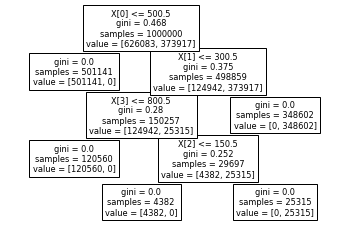

In [43]:
tree.plot_tree(t)

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.50, random_state=42)

In [72]:
t1 = tree.DecisionTreeClassifier()
t1 = t1.fit(X_train, y_train)

[Text(133.92000000000002, 195.696, 'X[0] <= 500.5\ngini = 0.468\nsamples = 500000\nvalue = [313015, 186985]'),
 Text(66.96000000000001, 152.208, 'gini = 0.0\nsamples = 250427\nvalue = [250427, 0]'),
 Text(200.88000000000002, 152.208, 'X[1] <= 300.5\ngini = 0.376\nsamples = 249573\nvalue = [62588, 186985]'),
 Text(133.92000000000002, 108.72, 'X[3] <= 800.5\ngini = 0.278\nsamples = 75144\nvalue = [62588, 12556]'),
 Text(66.96000000000001, 65.232, 'gini = 0.0\nsamples = 60361\nvalue = [60361, 0]'),
 Text(200.88000000000002, 65.232, 'X[2] <= 150.5\ngini = 0.256\nsamples = 14783\nvalue = [2227, 12556]'),
 Text(133.92000000000002, 21.744, 'gini = 0.0\nsamples = 2227\nvalue = [2227, 0]'),
 Text(267.84000000000003, 21.744, 'gini = 0.0\nsamples = 12556\nvalue = [0, 12556]'),
 Text(267.84000000000003, 108.72, 'gini = 0.0\nsamples = 174429\nvalue = [0, 174429]')]

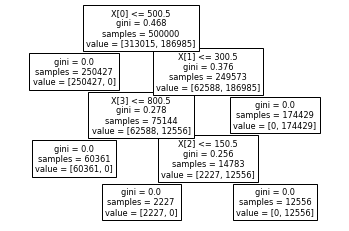

In [73]:
tree.plot_tree(t1)

In [74]:
scores = cross_validate(t1, X_test, y_test, cv=3, scoring=('r2', 'neg_mean_squared_error'), return_train_score=True)
print(scores['test_neg_mean_squared_error'])

[-0. -0. -0.]


In [75]:
print(scores['train_r2'])

[1. 1. 1.]


In [79]:
import pickle

In [80]:
s = pickle.dumps(t1)
f = open('../datasets/my_first_ai', 'wb')
f.write(s)
f.close()